In [1003]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TRAINING DATASET

## Import Data

In [1004]:
# Load train.csv data
train_df = pd.read_csv("/Users/sa18/Desktop/House_Price/Data/train.csv")

## Data Understanding

In [1005]:
# shape of DataFrame
train_df.shape

(1460, 81)

This dataset has 81 columns and 1460 rows.

In [1006]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1007]:
# list the columns
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1008]:
# check DataFrame structure
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1009]:
# Check for missing values
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

According to this, `LotFrontage` seems to be the only feature with null values. I want to dig deeper, to make sure that's true.

In [1010]:
# Check for nulls across the entire DataFrame

train_df.isnull().sum()[train_df.isnull().sum() >0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

What a surprise! These columns have missing values. I will go a step further and break these down into percentages, to see what that looks like. 

In [1011]:
# Checking percentage of missing values in each column

# Get the sum of missing values. Divide by the length of the DataFrame, then multiply by 100, to see what percent of each column has missing values
missing_values = (train_df.isnull().sum() / len(train_df)) * 100   

# Filter to show only the columns with missing values that are > 0
missing_values = missing_values[missing_values > 0]

# Sort the columns with missing values in numerical order
missing_values.sort_values()

Electrical       0.068493
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
MasVnrType      59.726027
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

The columns with the most missing values are `PoolQC`, `MiscFeature`, `Alley`, `Fence` and `MasVnrType`. 
`LotFrontage` has 259 null values, but that accounts for only 17.7% of the DataFrame. 
Note to Self: I will have to return and address the columns above before applying a machine learning algorithm. 

In [1012]:
# Describe the dataset's info and stats
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


`SalePrice` ranges from $34,900.00 to $755,000.00. 
There are a lot of features with a "0" median. This most likely means that those features are not available for most of the homes in the dataset. 
`YearBuilt` shows that the oldest home was built as early as 1872 (!!!) and the most recent homes were built in 2010.

In [1013]:
# check for duplicates
train_df.duplicated().sum()

0

There are no duplicate items in this dataset.

In [1014]:
# Check for unique values in each column
train_df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

# Univariate Analysis

In [1015]:
# Separate categorical and numerical columns

numeric_cols = train_df.select_dtypes(include=["int64", "float64"]).columns.to_list()   #to get list of categorical columns

categorical_cols = train_df.select_dtypes(include=["object"]).columns.to_list()  #to get list of numerical columns

print (f'There are {len(numeric_cols)} numerical and {len(categorical_cols)} categorical features in the training data.')

There are 38 numerical and 43 categorical features in the training data.


In [1016]:
numeric_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [1017]:
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [1018]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


I will be dropping `Id`, `Street`, `Alley`, `LandContour`, `Utilities`, `PoolArea`, `PoolQC`, `Fence`, `MiscFeature`, `SaleType` and `SaleCondition`

Since the purpose of this endeavor is to train a machine to predict sale price, this Univariate Analysis section will begin by looking at `SalePrice.`

In [1019]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

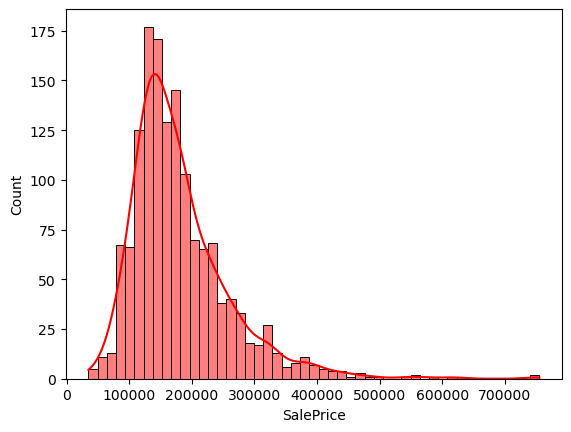

In [1020]:
# create histogram of `SalePrice`

sns.histplot(train_df['SalePrice'], kde = True, color = 'r')

`SalePrice` does not have a normal distribution. It has a long tail on the right, making it right skewed. The minimum price for a home in this training dataset is $34,900 and the maximum price is $755,000. The maximum price seems unusually exorbitant for Iowa. My guess is that this is for a new development. It looks like the majority of this dataset contains houses that are priced in the low range, and there isn't much inventory for houses that are greater than $400k. Regardless, `SalePrice` is right skewed. The data might need to be transformed, to get a normal distribution, before building a maching learning model. 

In [1021]:
# For cleaning: 
# since `SalePrice` is right skewed, so it needs to be normally distributed before we can move on to machine learning. 
# Apply log scale to transform the target variable (`SalePrice`)
#target = np.log(train_df['SalePrice'])

#sns.histplot(target, kde = True, color = 'b')

`SalePrice` now has a more normal distribution. 

In [1022]:
train_df['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

<Axes: xlabel='YearBuilt', ylabel='Count'>

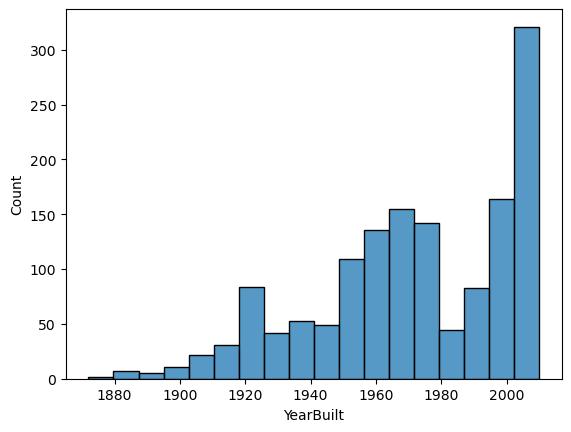

In [1023]:
sns.histplot(train_df['YearBuilt'])

Less than 50 homes in this dataset were originally built in the late 1800s and more than 300 were built in the 2000s. The mean original construction year is 1971 and the median year is 1973. The majority of the homes in this dataset were built in the 2000s, making the `YearBuilt` feature right skewed.

In [1024]:
train_df['YrSold'].describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

<Axes: xlabel='YrSold', ylabel='Count'>

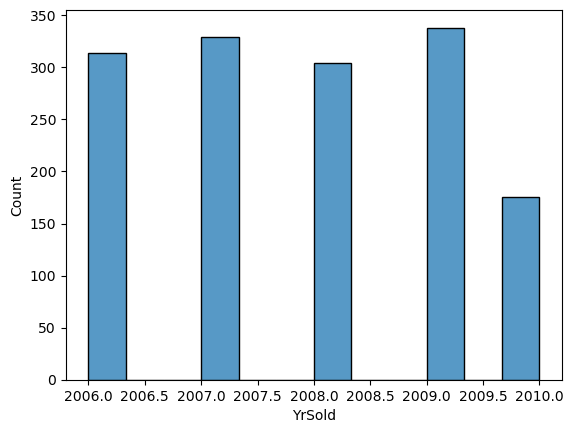

In [1025]:
sns.histplot(train_df['YrSold'])

In [1026]:
train_df['MoSold'].describe()

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64

<Axes: xlabel='MoSold', ylabel='Count'>

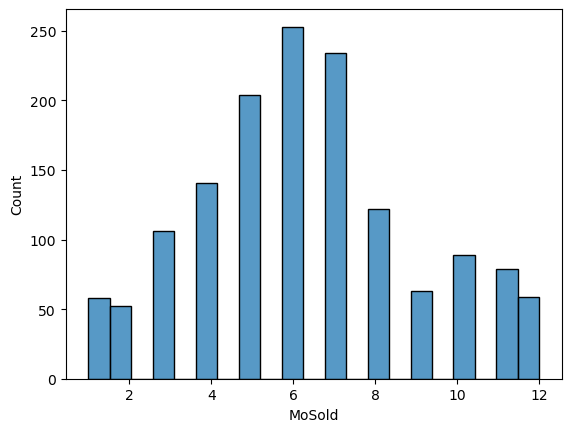

In [1027]:
sns.histplot(train_df['MoSold'])

# Bivariate Analysis

In [1028]:
# SalePrice and YearBuilt

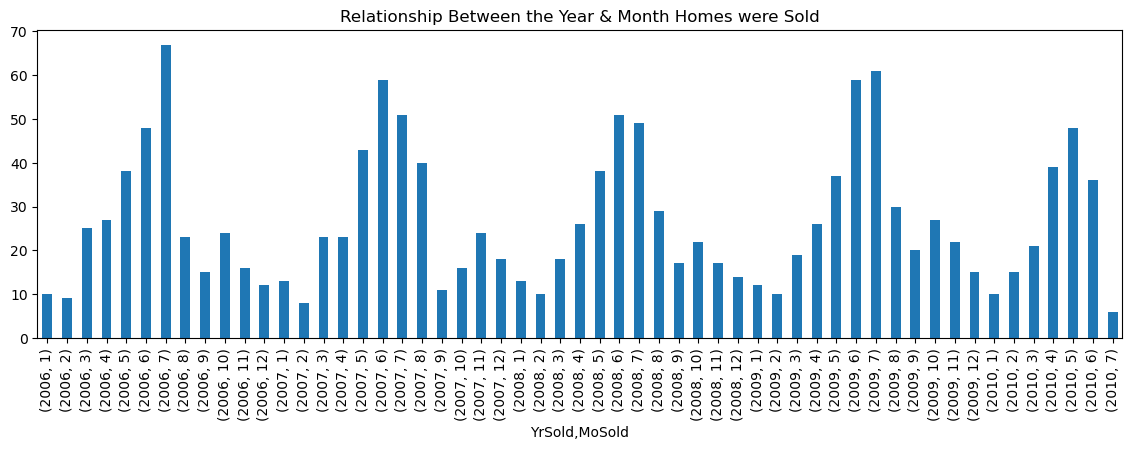

In [1029]:
# Looking at the relationship between the year and month that homes were sold

Sales = train_df.groupby(['YrSold', 'MoSold']).size()

Sales.plot(kind='bar', figsize=(14,4))
plt.title("Relationship Between the Year & Month Homes were Sold")
plt.xlabel = ("Year and Month")
plt.ylabel = ("Number of Sales")
plt.show()

Realtors tend to list homes for sale just before the spring and summer season begins, because that is when buyers tend to flood the market. Surely, people are constantly in need of housing, despite the weather. However, real estate trends show that, outside of situations where buyers are desperate to find a home, they tend to look in the warmer months. This trend is reflected in the chart above, as it shows that most homes were sold in June and July every year. I'd be interested in seeing if there is any correlation between `SalePrice`, `YrSold` and `MoSold`. 

In [1030]:
# SalePrice and OverallQual

# Multivariate Analysis

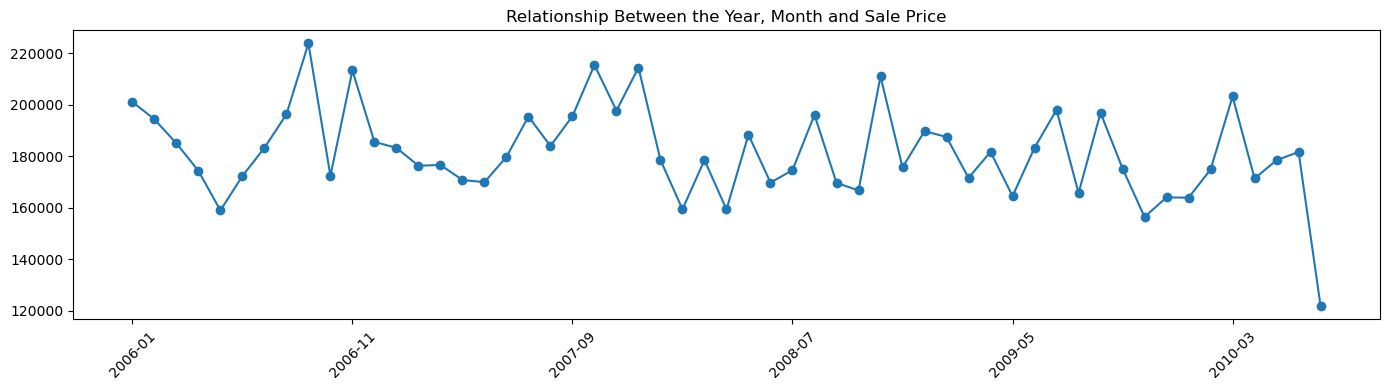

In [1035]:
# Relationship between Sale Price, Year Sold and Month Sold

avg_sales_over_time = train_df.groupby(['YrSold', 'MoSold'])['SalePrice'].mean()

avg_sales_over_time.index = avg_sales_over_time.index.map(lambda x: f'{x[0]}-{x[1]:02d}')

avg_sales_over_time.plot(kind='line', figsize=(14,4), marker='o')
plt.title("Relationship Between the Year, Month and Sale Price")
plt.xlabel = ("Year and Month")
plt.ylabel = ("Sale Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

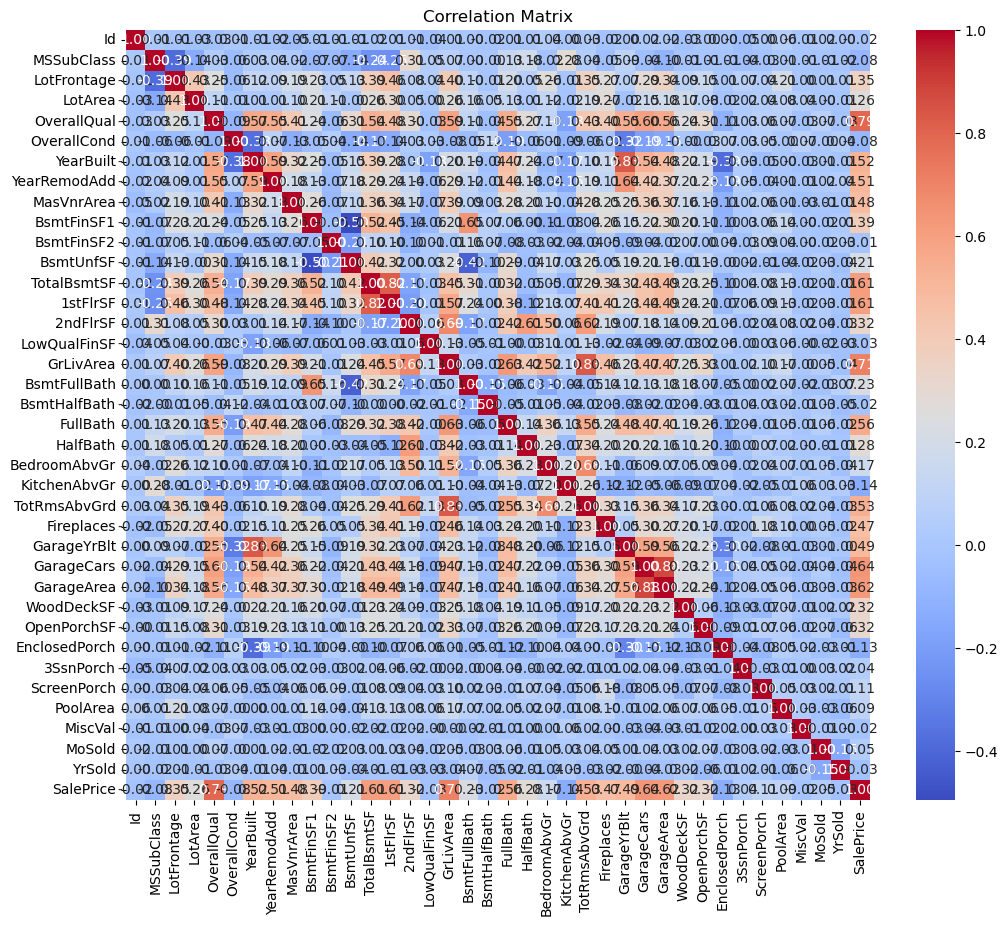

In [1032]:
#for cleaning: drop `Id` column from training data
#train_df.drop('Id', axis=1)


correl = train_df[numeric_cols]

plt.figure(figsize=(12,10))
sns.heatmap(correl.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Defintely need to remove `Id` from DataFrame.